In [1]:
import numpy
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline  

In [40]:
fn = 'perseus_HSC_morphologies - ds9.csv'
data = numpy.loadtxt(fn, delimiter=",", skiprows=2, usecols=(2,3,5,29,28),
                    converters = {28: lambda s: float(s.strip() or 0)})

patch = data[:,4]
in_hsc = data[:,4] > 0
hsc = data[in_hsc]

is_interacting = (hsc[:,3]==1)
interacting = hsc[is_interacting]

c_ra = 49.9506671
c_dec = 41.5116961
cos_dec = numpy.cos(numpy.radians(c_dec))
r = numpy.hypot((hsc[:,0]-c_ra)*cos_dec, hsc[:,1]-c_dec)
delta_z = hsc[:,2] - 5366.
r_mpc = r * 1.25


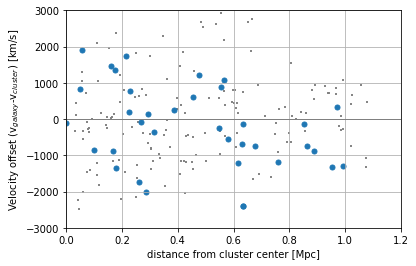

In [44]:
fig = pl.figure()
ax = fig.add_subplot(111)

ax.scatter(r_mpc, delta_z, s=1, marker=',', c='grey')
ax.scatter(r_mpc[is_interacting], delta_z[is_interacting], s=25)
ax.set_xlabel(r"distance from cluster center [Mpc]")
ax.set_ylabel(r"Velocity offset (v$_{galaxy}$-v$_{cluster}$) [km/s]")
ax.set_xlim((-0.00,1.2))
ax.set_ylim((-3000,3000))
ax.axhline(0, c='grey', lw=1)
ax.grid(True)
fig.show()
fig.set_size_inches((6,4))
fig.savefig("observer_phasespace.png", dpi=200,bbox_inches='tight')